Support Vector Machines (SVM)
------

<center><img src="images/support_svm.png" width="600"/></center>

Support Vector Machines (SVM) can solve roommate conflict
------
<center><img src="images/roommate.jpg" width="700"/></center>

When I was a student in SF, I had to share a room with a roommate. 

It was huge room and our stuff was all over the floor. We too lazy to pick the stuff up. But we wanted privacy.

Our solution was to separate our stuff but all we had was a straight room divider.

We could the divider anywhere, we decided it was most fair to put in the middle of our stuff.

<center><img src="images/panel_divider.jpg" width="700"/></center>

Quick Review
-----

- Supervised Classifers
- Train/Test split
- Bias-Variance trade-offs
- Regularizaiton
- Evaluation metrics

By The End Of This Session You Should Be Able To:
----

- Explain Support Vector Machines (SVM) in your own words
- Fit and interpert a SVM to data
- Explain the concept of decision boundaries
- Find the support vectors for a SVM
- Explain the Kernel Trick in your own words

Define SVM
-----

A machine learning technique that discovers how to separate classes of data.

A flexible and powerful supervised algorithms.


In [48]:
reset -fs

In [85]:
# Imports for plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(); sns.set_style("whitegrid", {'axes.grid' : False}) # Use seaborn plotting defaults

%matplotlib inline

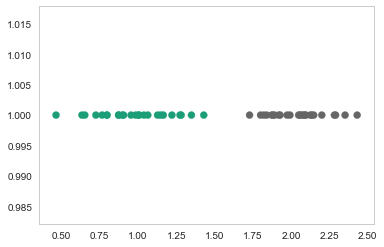

In [78]:
# 1 dimensional data with 2 classes

from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.2)
plt.scatter(X[:, 0], y=np.ones(X.shape[0]), c=y, s=50, cmap='Dark2');

SVMs are a Discriminative Classification Algorithm
----

<center><img src="images/discriminative.png" width="300"/></center>

Find a boundary that divides the classes from each other (training).

Use that boundary to predict new data class membership (inference).

Generative Classification Algorithm
-----

<center><img src="images/generative.png" width="300"/></center>

Learn a probabilistical model of the distribution for each class (training).

Use that distribution model to predict labels for new points (inference).

For example, Naive Bayes Classification

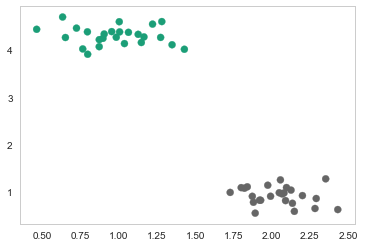

In [79]:
# Let's jump to 2 dimensions
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2');

SVM scale with dimensionality
------

A point in 1 dimensions.

A line or curve in 2 dimensions.

A manifold in higher dimensions.

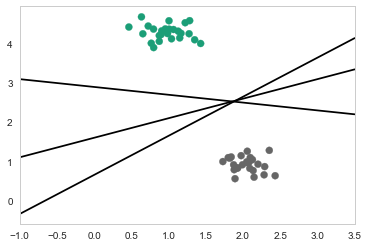

In [80]:
# Many linear bounds allow for perfect separation

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

SVM: Maximize the "Margin"
-----
Rather than drawing a zero-width line between the classes

Draw a margin around each line of some width.

The width should be up to the nearest point of each class.

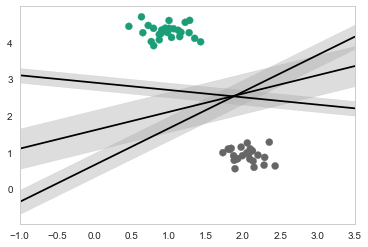

In [82]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, 
                     edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Case Study: What is in the box?
-------

<center><img src="images/Mystery_Box.jpg" width="700"/></center>

In [84]:
# Size of the boxes
X = [[8, 12], 
     [20, 25]]
 
# What is in the box
y = ['orange', 'basketball']

Always visually inspect the data first
------

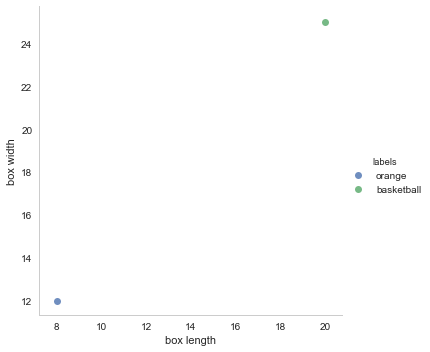

In [87]:
# Munge data into Pandas dataframe for easier ploting
df = pd.DataFrame(X, columns=['box length', 'box width']); df['labels'] = ['orange', 'basketball']

item_plot = sns.lmplot(data=df, x='box length', y='box width',
                      fit_reg=False, hue="labels", legend=True);

Fit SVM
-----

In [52]:
from sklearn import svm

In [53]:
# Define an instance of a SVM classifer
clf = svm.SVC()

In [54]:
# Estimate the classifer for our data
clf.fit(X, y);  

After being fitted, the model can then be used to predict new values:

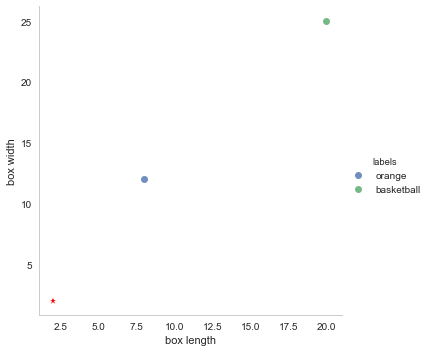

In [59]:
value = [2, 2]      # New data point #1
# value = [30, 30]  # New data point #2 
# value = [16, 16]  # New data point #3

# Plot 
item_plot = sns.lmplot(data=df, x='box length', y='box width', fit_reg=False, hue="labels", legend=True);
item_plot.ax.plot(value[0], value[1], color='red', marker='*');

# Predict
# clf.predict([value]).item()

Check for understanding
-------

What are the support vectors in this example?

In [60]:
# Get support vectors
clf.support_vectors_

array([[20., 25.],
       [ 8., 12.]])

Reference: http://scikit-learn.org/stable/modules/svm.html

Case Study: Everyone's favorite… The Iris Dataset
------

<center><img src="images/iris.jpg" width="700"/></center>

In [99]:
from sklearn import datasets

iris = datasets.load_iris()

In [100]:
X = iris.data[:, :2] # Use only the first two features for easier plotting
y = iris.target

In [101]:
# Define & fit model
clf = svm.SVC().fit(X, y)
predicted = clf.predict(iris.data[:, :2])

In [102]:
# Evaluation of model
from sklearn.metrics import confusion_matrix
from pprint_cm import pprint_cm

pprint_cm(cm=confusion_matrix(predicted, iris.target), 
         labels=iris.target_names)

                   setosa versicolor  virginica 
        setosa       50.0        0.0        0.0 
    versicolor        0.0       38.0       14.0 
     virginica        0.0       12.0       36.0 


Check for understanding
------

How well does our model do?

Where does it make mistakes?

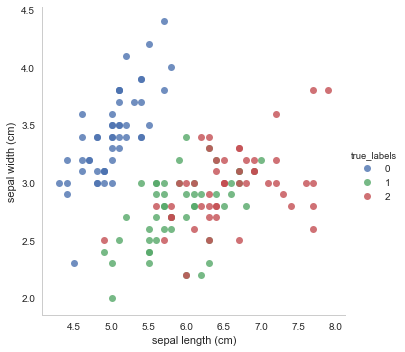

In [103]:
# The ground truth
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['true_labels'] = iris.target

svm_plot = sns.lmplot(data=df, x='sepal length (cm)', y='sepal width (cm)',
                      fit_reg=False, hue="true_labels", legend=True);

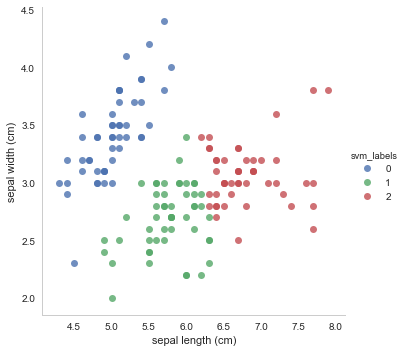

In [104]:
# The fitted model
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['svm_labels'] = predicted

svm_plot = sns.lmplot(data=df, x='sepal length (cm)', y='sepal width (cm)',
                      fit_reg=False, hue="svm_labels", legend=True);

TODO: refactor below!!!!

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

# Plot svm

In [105]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

ValueError: cannot reshape array of size 2700 into shape (30,30)

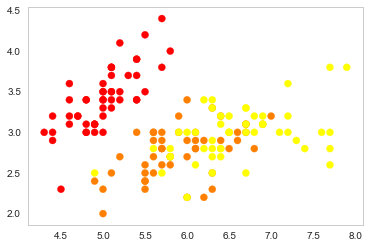

In [106]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf);

In [71]:
# Data manipulation
import pandas as pd

# Plotting
import seaborn as sns

In [73]:
import numpy as np

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_ = np.arange(x_min, x_max, h)
y_ = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x_, y_)

Check for understanding
-------

What are the support vectors in this example?

In [69]:
## Get support vectors
# clf.support_vectors_

Kernel Trick: The one weird thing that makes linear classifiers fit better
-----

Remember earlier our number line with examples on it…


<center><img src="images/kernel.png" width="700"/></center>

What is a Kernel?
------

A Kernel maps lower dimesnional data into higher demsions.

Hopefully, the data is then linearly seperable in higher dimensions.

Kernels are often nonlinear!

Question for Thought
-----

What are the disadvanateges of a kernel?

- Picking the "right" kernel can be hard
- Since kernels are nonlinear and higher dimensional scaling, there can be high computational cost.

When should you use SVMs?
-----

use small about the data
    + can handle class imbalances
    + can be extended for anonlymy dectetion
    + fast for prediction

When should you NOT use SVMs?
-----

- Slow to train
- sensetive to regularization and kernel choices

Check for understanding
------

I want to build XX....

Summary
------

- Support Vector Machines (SVM) are 

Further Study
-----

- Work through a more complex example. [Python Data Science Handbook by Jake VanderPlas; J](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)
- Dig into the math of SVM. [The Elements of Statistical Learning](http://www.springer.com/us/book/9780387848570)
- Implement your own SVM classifer. [Example](http://tullo.ch/articles/svm-py/)
- Explore kernels. [Learning with Kernels: Support Vector Machines, Regularization, Optimization, and Beyond](https://www.amazon.com/Learning-Kernels-Regularization-Optimization-Computation/dp/0262194759)
- Hard vs. Soft margin

Questions?
------

<center><img src="images/mug.png" width="700"/></center>

<br>
<br> 
<br>

----